# Cell Phone insights

## Data Source:Kaggle 
### GitHub Link: https://github.com/Innocentia-007/Learning-Data-Cell-Phone
## Dataset Describtion: My Dataset consists of the Cell phones Brands(mostly all the cellphone brands you cab think about, from your iphones to you nokia, sony etc...), the model, the ram, screensize in inches, camera in MP and Battery capacity as well as the price.


In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from scipy.stats import skew, kurtosis
import re
import math
from collections import Counter


In [134]:
data = pd.read_csv("Mobile phone price.csv")
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.10,12 + 12 + 12,3095,999.0
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.80,108 + 10 + 10 + 12,5000,1199.0
2,OnePlus,9 Pro,128 GB,8 GB,6.70,48 + 50 + 8 + 2,4500,899.0
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279.0
4,Google,Pixel 6,128 GB,8 GB,6.40,50 + 12.2,4614,799.0


# Cleaning my data

### Checking for empty data

In [135]:
data.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

### check for data types

In [136]:
data.dtypes

Brand                      object
Model                      object
Storage                    object
RAM                        object
Screen Size (inches)       object
Camera (MP)                object
Battery Capacity (mAh)      int64
Price ($)                 float64
dtype: object

### Clean Storage and make to float /int

In [137]:
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [138]:
def clean_storage(x):
    #make to lower case, remove extra spaces
    x = ''.join(str(x).lower().split())
    # use regex to remove any letters
    x = re.sub(r'[a-zA-Z]', '', x)
    x = ''.join(x.split())
    if len(x) == 0:
        return 0
    else:
        return float(x)
    
data['storage_gb'] = data['Storage '].apply(clean_storage)
data.drop(columns=['Storage '], inplace=True, axis=1)
data.head()

,Brand,Model,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),storage_gb
0,Apple,iPhone 13 Pro,6 GB,6.10,12 + 12 + 12,3095,999.0,128.0
1,Samsung,Galaxy S21 Ultra,12 GB,6.80,108 + 10 + 10 + 12,5000,1199.0,256.0
2,OnePlus,9 Pro,8 GB,6.70,48 + 50 + 8 + 2,4500,899.0,128.0
3,Xiaomi,Redmi Note 10 Pro,6 GB,6.67,64 + 8 + 5 + 2,5020,279.0,128.0
4,Google,Pixel 6,8 GB,6.40,50 + 12.2,4614,799.0,128.0


### Clean Camera Mp

In [139]:
def clean_camera(x):
    x = ''.join(str(x).lower().split())
    # remove letters
    x = re.sub(r'[a-zA-Z]', '', x)
    camera_mp_sum = sum([ float(i) if len(i) > 0 else 0 for i in x.split("+") ])
    return camera_mp_sum

data['camera_mp_sum'] = data['Camera (MP)'].apply(clean_camera)
data.drop(columns=['Camera (MP)'], inplace=True, axis=1)
data.head()

,Brand,Model,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),storage_gb,camera_mp_sum
0,Apple,iPhone 13 Pro,6 GB,6.10,3095,999.0,128.0,36.0
1,Samsung,Galaxy S21 Ultra,12 GB,6.80,5000,1199.0,256.0,140.0
2,OnePlus,9 Pro,8 GB,6.70,4500,899.0,128.0,108.0
3,Xiaomi,Redmi Note 10 Pro,6 GB,6.67,5020,279.0,128.0,79.0
4,Google,Pixel 6,8 GB,6.40,4614,799.0,128.0,62.2


In [140]:
def clean_ram(x):
    #make to lower case, remove extra spaces
    x = ''.join(str(x).lower().split())
    # use regex to remove any letters
    x = re.sub(r'[a-zA-Z]', '', x)
    x = ''.join(x.split())
    if len(x) == 0:
        return 0
    else:
        return float(x)
    
data['ram_gb'] = data['RAM '].apply(clean_ram)
data.drop(columns=['RAM '], inplace=True, axis=1)
data.head()

,Brand,Model,Screen Size (inches),Battery Capacity (mAh),Price ($),storage_gb,camera_mp_sum,ram_gb
0,Apple,iPhone 13 Pro,6.10,3095,999.0,128.0,36.0,6.0
1,Samsung,Galaxy S21 Ultra,6.80,5000,1199.0,256.0,140.0,12.0
2,OnePlus,9 Pro,6.70,4500,899.0,128.0,108.0,8.0
3,Xiaomi,Redmi Note 10 Pro,6.67,5020,279.0,128.0,79.0,6.0
4,Google,Pixel 6,6.40,4614,799.0,128.0,62.2,8.0


### clean inches

- use function for camera cleaning to fix this issue: ValueError: could not convert string to float: '6.8+3.9'
- so that those screen can be added together

In [141]:
def clean_screen_inch(x):
    #make to lower case, remove extra spaces
    x = ''.join(str(x).lower().split())
    # use regex to remove any letters
    x = re.sub(r'[^0-9.+]', '', x)
    x = ''.join(x.split())
    # used this function for screen that have 2 number
    x = clean_camera(x)
    return x
    
data['screen_inch'] = data['Screen Size (inches)'].apply(clean_screen_inch)
data.drop(columns=['Screen Size (inches)'], inplace=True, axis=1)
data.head()

,Brand,Model,Battery Capacity (mAh),Price ($),storage_gb,camera_mp_sum,ram_gb,screen_inch
0,Apple,iPhone 13 Pro,3095,999.0,128.0,36.0,6.0,6.10
1,Samsung,Galaxy S21 Ultra,5000,1199.0,256.0,140.0,12.0,6.80
2,OnePlus,9 Pro,4500,899.0,128.0,108.0,8.0,6.70
3,Xiaomi,Redmi Note 10 Pro,5020,279.0,128.0,79.0,6.0,6.67
4,Google,Pixel 6,4614,799.0,128.0,62.2,8.0,6.40


### make battery capacity for a float

In [142]:
#data['Battery Capacity (mAh)'] = data['Battery Capacity (mAh)'].astype(float)
#data.head()

In [107]:
data.dtypes

Brand                      object
Model                      object
Battery Capacity (mAh)      int64
Price ($)                 float64
storage_gb                float64
camera_mp_sum             float64
ram_gb                    float64
screen_inch               float64
dtype: object

# Stats description

### For Battery Capacity 


In [108]:

#function to calculate the sum
def calculate_sum(d):
    total = 0 
    for num in d:
        total += num
    return total
    
#funcdtion to calculate the mean
def calculate_mean(d):
    total = sum(d)
    mean = total / len(d)
    return mean

#fun to calculate the median
def calculate_median(d):
    sorted_data = sorted(d)
    n = len(d)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]
        
#function to calculate the mode
def calculate_mode(d):
    frequency = {}
    for value in d:
        frequency[value] = frequency.get(value, 0) + 1
    max_frequency = max(frequency.values())
    mode_values = [key for key, val in frequency.items() if val == max_frequency]
    return mode_values

#function to calculate the minimum
def calculate_min(d):
    if len(d) == 0:
        return None
    min_value = d[0]
    for num in d:
        if num < min_value:
            min_value = num
    return min_value
    
#function to calculate the maximum
def calculate_max(d):
    if len(d) == 0:
        return None
    max_value = d[0]
    for num in d:
        if num > max_value:
            max_value = num
    return max_value

# Calculate Range
def calculate_range(d):
    if len(d) == 0:
        return None
    return max(d) - min(d)

#function to calculate quartiles
def calculate_quartiles(d):
    d_sort = sorted(d)
    n = len(d_sort)
    
    #d.sort()
    length = len(d)
    
    # Q1 (25th percentile)
    q1_index = int(length * 0.25)
    q1 = d[q1_index]
    
    # Q2 (median, 50th percentile)
    q2 = calculate_median(d)
    
    # Q3 (75th percentile)
    q3_index = int(length * 0.75)
    q3 = d[q3_index]
    return q1, q2, q3

#function for calculating the IQR
def calculate_iqr(d):
    q1, _, q3 = calculate_quartiles(d)
    return q3 - q1
    
#function to calculate the variance
def calculate_variance(d):
    n = len(d)
    if n == 0:
        return None
    mean = sum(d) / n
    variance = sum((x - mean) ** 2 for x in d) / n
    return variance

#function to calculate the standard deviation
def calculate_std_dev(d):
    if len(d) == 0:
        return None
    mean = sum(d) / len(d)
    variance = sum((x - mean) ** 2 for x in d) / len(d)
    std_dev = math.sqrt(variance)
    return std_dev
   
# Calculate Coefficient of Variation (CV)
def calculate_cv(d):
    if len(d) == 0:
        return None
    std_dev = np.std(d)
    mean = np.mean(d)
    cv = (std_dev / mean) * 100
    return cv

#function to Calculate Skewness
def calc_skewness(d):
    return skew(d)

#function to  Calculate Kurtosis
def calc_kurtosis(d):
    return kurtosis(d)
#Descriptive statistics for 'Units Sold' column
Battery_Capacity = data['Battery Capacity (mAh)']

#Calculate descriptive statistics
print("1. Sum:", calculate_sum(Battery_Capacity))
print("2. Mean:", calculate_mean(Battery_Capacity))
print("3. Median:", calculate_median(Battery_Capacity))
print("4. Mode:", calculate_mode(Battery_Capacity))
print("5. Minimum:", calculate_min(Battery_Capacity))
print("6. Maximum:", calculate_max(Battery_Capacity))
print("7. Range:", calculate_range(Battery_Capacity) )
print("8. Quartiles:", calculate_quartiles(Battery_Capacity))
print("9. Interquartile Range (IQR):", calculate_iqr(Battery_Capacity))
print("10. Skewness:", calc_skewness(Battery_Capacity))
print("11. Kurtosis:", calc_kurtosis(Battery_Capacity))
print("12. Standard Deviation:", calculate_std_dev(Battery_Capacity))
print("13. Variance:", calculate_variance(Battery_Capacity))
print("14. Coefficient of Variation (CV):", calculate_cv(Battery_Capacity))
#print("15. Zscore:", calc_zscore(Battery_Capacity))


1. Sum: 1903326
2. Mean: 4676.4766584766585
3. Median: 5000
4. Mode: [5000]
5. Minimum: 1821
6. Maximum: 7000
7. Range: 5179
8. Quartiles: (4200, 5000, 2815)
9. Interquartile Range (IQR): -1385
10. Skewness: -0.815846496709366
11. Kurtosis: 2.0726618726159165
12. Standard Deviation: 796.2137575646816
13. Variance: 633956.3477352696
14. Coefficient of Variation (CV): 17.025932463951285


### for price 

In [116]:

#function to calculate the sum
def calculate_sum(d):
    total = 0 
    for num in d:
        total += num
    return total
    
#funcdtion to calculate the mean
def calculate_mean(d):
    total = sum(d)
    mean = total / len(d)
    return mean

#fun to calculate the median
def calculate_median(d):
    sorted_data = sorted(d)
    n = len(d)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]
        
#function to calculate the mode
def calculate_mode(d):
    frequency = {}
    for value in d:
        frequency[value] = frequency.get(value, 0) + 1
    max_frequency = max(frequency.values())
    mode_values = [key for key, val in frequency.items() if val == max_frequency]
    return mode_values

#function to calculate the minimum
def calculate_min(d):
    if len(d) == 0:
        return None
    min_value = d[0]
    for num in d:
        if num < min_value:
            min_value = num
    return min_value
    
#function to calculate the maximum
def calculate_max(d):
    if len(d) == 0:
        return None
    max_value = d[0]
    for num in d:
        if num > max_value:
            max_value = num
    return max_value

# Calculate Range
def calculate_range(d):
    if len(d) == 0:
        return None
    return max(d) - min(d)

#function to calculate quartiles
def calculate_quartiles(d):
    d_sort = sorted(d)
    n = len(d_sort)
    
    #d.sort()
    length = len(d)
    
    # Q1 (25th percentile)
    q1_index = int(length * 0.25)
    q1 = d[q1_index]
    
    # Q2 (median, 50th percentile)
    q2 = calculate_median(d)
    
    # Q3 (75th percentile)
    q3_index = int(length * 0.75)
    q3 = d[q3_index]
    return q1, q2, q3

#function for calculating the IQR
def calculate_iqr(d):
    q1, _, q3 = calculate_quartiles(d)
    return q3 - q1
    
#function to calculate the variance
def calculate_variance(d):
    n = len(d)
    if n == 0:
        return None
    mean = sum(d) / n
    variance = sum((x - mean) ** 2 for x in d) / n
    return variance

#function to calculate the standard deviation
def calculate_std_dev(d):
    if len(d) == 0:
        return None
    mean = sum(d) / len(d)
    variance = sum((x - mean) ** 2 for x in d) / len(d)
    std_dev = math.sqrt(variance)
    return std_dev
   
# Calculate Coefficient of Variation (CV)
def calculate_cv(d):
    if len(d) == 0:
        return None
    std_dev = np.std(d)
    mean = np.mean(d)
    cv = (std_dev / mean) * 100
    return cv

#function to Calculate Skewness
def calc_skewness(d):
    return skew(d)

#function to  Calculate Kurtosis
def calc_kurtosis(d):
    return kurtosis(d)
#Descriptive statistics for 'Units Sold' column
Price = data['Price ($)']

#Calculate descriptive statistics
print("1. Sum:", calculate_sum(Price))
print("2. Mean:", calculate_mean(Price))
print("3. Median:", calculate_median(Price))
print("4. Mode:", calculate_mode(Price))
print("5. Minimum:", calculate_min(Price))
print("6. Maximum:", calculate_max(Price))
print("7. Range:", calculate_range(Price))
print("8. Quartiles:", calculate_quartiles(Price))
print("9. Interquartile Range (IQR):", calculate_iqr(Price))
print("10. Skewness:", calc_skewness(Price))
print("11. Kurtosis:", calc_kurtosis(Price))
print("12. Standard Deviation:", calculate_std_dev(Price))
print("13. Variance:", calculate_variance(Price))
print("14. Coefficient of Variation (CV):", calculate_cv(Price))
#print("15. Zscore:", calc_zscore(Battery_Capacity))


1. Sum: 166184.0
2. Mean: 408.3144963144963
3. Median: 299.0
4. Mode: [199.0]
5. Minimum: 99.0
6. Maximum: 1999.0
7. Range: 1900.0
8. Quartiles: (299.0, 299.0, 799.0)
9. Interquartile Range (IQR): 500.0
10. Skewness: 1.611155257252087
11. Kurtosis: 2.561622584650192
12. Standard Deviation: 299.3163781226503
13. Variance: 89590.29421246136
14. Coefficient of Variation (CV): 73.30535183646963


For Screen 

In [118]:

#function to calculate the sum
def calculate_sum(d):
    total = 0 
    for num in d:
        total += num
    return total
    
#funcdtion to calculate the mean
def calculate_mean(d):
    total = sum(d)
    mean = total / len(d)
    return mean

#fun to calculate the median
def calculate_median(d):
    sorted_data = sorted(d)
    n = len(d)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]
        
#function to calculate the mode
def calculate_mode(d):
    frequency = {}
    for value in d:
        frequency[value] = frequency.get(value, 0) + 1
    max_frequency = max(frequency.values())
    mode_values = [key for key, val in frequency.items() if val == max_frequency]
    return mode_values

#function to calculate the minimum
def calculate_min(d):
    if len(d) == 0:
        return None
    min_value = d[0]
    for num in d:
        if num < min_value:
            min_value = num
    return min_value
    
#function to calculate the maximum
def calculate_max(d):
    if len(d) == 0:
        return None
    max_value = d[0]
    for num in d:
        if num > max_value:
            max_value = num
    return max_value

# Calculate Range
def calculate_range(d):
    if len(d) == 0:
        return None
    return max(d) - min(d)

#function to calculate quartiles
def calculate_quartiles(d):
    d_sort = sorted(d)
    n = len(d_sort)
    
    #d.sort()
    length = len(d)
    
    # Q1 (25th percentile)
    q1_index = int(length * 0.25)
    q1 = d[q1_index]
    
    # Q2 (median, 50th percentile)
    q2 = calculate_median(d)
    
    # Q3 (75th percentile)
    q3_index = int(length * 0.75)
    q3 = d[q3_index]
    return q1, q2, q3

#function for calculating the IQR
def calculate_iqr(d):
    q1, _, q3 = calculate_quartiles(d)
    return q3 - q1
    
#function to calculate the variance
def calculate_variance(d):
    n = len(d)
    if n == 0:
        return None
    mean = sum(d) / n
    variance = sum((x - mean) ** 2 for x in d) / n
    return variance

#function to calculate the standard deviation
def calculate_std_dev(d):
    if len(d) == 0:
        return None
    mean = sum(d) / len(d)
    variance = sum((x - mean) ** 2 for x in d) / len(d)
    std_dev = math.sqrt(variance)
    return std_dev
   
# Calculate Coefficient of Variation (CV)
def calculate_cv(d):
    if len(d) == 0:
        return None
    std_dev = np.std(d)
    mean = np.mean(d)
    cv = (std_dev / mean) * 100
    return cv

#function to Calculate Skewness
def calc_skewness(d):
    return skew(d)

#function to  Calculate Kurtosis
def calc_kurtosis(d):
    return kurtosis(d)
#Descriptive statistics for 'Units Sold' column
Screen = data['screen_inch']

#Calculate descriptive statistics
print("1. Sum of Screen is:", calculate_sum(Screen))
print("2. Mean of Screen is:", calculate_mean(Screen))
print("3. Median of Screen is:", calculate_median(Screen))
print("4. Mode of Screen is:", calculate_mode(Screen))
print("5. Minimum of Screen is:", calculate_min(Screen))
print("6. Maximum of Screen is:", calculate_max(Screen))
print("7. Range of Screen is:", calculate_range(Screen))
print("8. Quartiles of Screen is:", calculate_quartiles(Screen))
print("9. Interquartile Range (IQR) of Screen is:", calculate_iqr(Screen))
print("10. Skewness of Screen is:", calc_skewness(Screen))
print("11. Kurtosis of Screen is:", calc_kurtosis(Screen))
print("12. Standard Deviation of Screen is:", calculate_std_dev(Screen))
print("13. Variance of Screen is:", calculate_variance(Screen))
print("14. Coefficient of Variation (CV) of Screen is:", calculate_cv(Screen))
#print("15. Zscore:", calc_zscore(Screen))


1. Sum of Screen is: 2637.7
2. Mean of Screen is: 6.48083538083538
3. Median of Screen is: 6.5
4. Mode of Screen is: [6.5]
5. Minimum of Screen is: 4.5
6. Maximum of Screen is: 10.7
7. Range of Screen is: 6.199999999999999
8. Quartiles of Screen is: (5.5, 6.5, 6.1)
9. Interquartile Range (IQR) of Screen is: 0.5999999999999996
10. Skewness of Screen is: 1.1560824252828936
11. Kurtosis of Screen is: 43.87303667429378
12. Standard Deviation of Screen is: 0.3821969209897498
13. Variance of Screen is: 0.14607448641404505
14. Coefficient of Variation (CV) of Screen is: 5.897340366335375


# Data Viz 

In [ ]:
data.head()

### GRAPHS

## Box plot for both Screen and Battery

-From the below box plot, i can conclude that the smaller your screen, the lower the battery usage and vice versa.
The data is more spread to the right for screen and left for battery


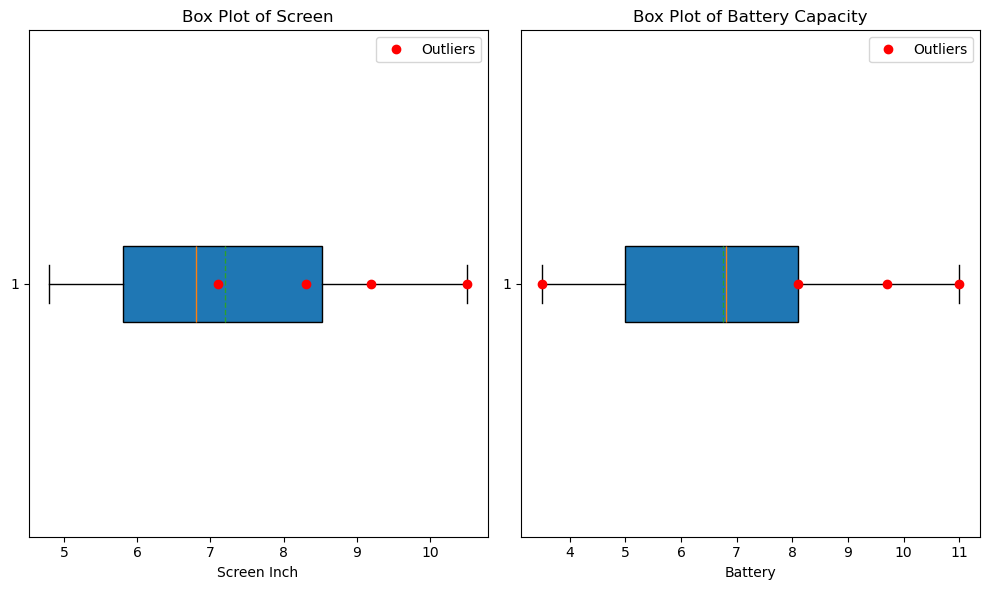

In [128]:

# Descriptive statistics for the first box plot
#Screen
min_value_1 = 4.5
q1_1 = 5.5
median_1 = 6.5
q3_1 = 6.1
max_value_1 = 10.7
iqr_1 = 0.6

# Descriptive statistics for the second box plot
min_value_2 = 3.8
q1_2 = 4.5
median_2 = 5.8
q3_2 = 6.3
max_value_2 = 11.2
iqr_2 = 0.8

# Calculate whisker ends for the first box plot
lower_whisker_1 = max(min_value_1, q1_1 - 1.5 * iqr_1)
upper_whisker_1 = min(max_value_1, q3_1 + 1.5 * iqr_1)

# Calculate whisker ends for the second box plot
lower_whisker_2 = max(min_value_2, q1_2 - 1.5 * iqr_2)
upper_whisker_2 = min(max_value_2, q3_2 + 1.5 * iqr_2)

# Sample data for the first box plot
Screen_1 = [4.8, 5.2, 6.0, 6.5, 7.1, 8.3, 9.2, 10.5]

# Sample data for the second box plot
Screen_2 = [3.5, 4.0, 5.0, 5.5, 6.8, 7.2, 8.1, 9.7, 11.0]

# Data points for outliers for the first box plot
outliers_1 = [value for value in Screen_1 if value < lower_whisker_1 or value > upper_whisker_1]

# Data points for outliers for the second box plot
outliers_2 = [value for value in Screen_2 if value < lower_whisker_2 or value > upper_whisker_2]

# Create a figure and two subplots for box plots
plt.figure(figsize=(10, 6))

# First subplot for the first box plot
plt.subplot(1, 2, 1)
plt.boxplot(Screen_1, vert=False, patch_artist=True, showmeans=True, meanline=True)
plt.plot(outliers_1, [1] * len(outliers_1), 'ro', label='Outliers')
plt.xlabel('Screen Inch')
plt.title('Box Plot of Screen')
plt.legend()

# Second subplot for the second box plot
plt.subplot(1, 2, 2)
plt.boxplot(Screen_2, vert=False, patch_artist=True, showmeans=True, meanline=True)
plt.plot(outliers_2, [1] * len(outliers_2), 'ro', label='Outliers')
plt.xlabel('Battery')
plt.title('Box Plot of Battery Capacity')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### show counts per brand

- Samsung is the highers, which means its the most bought brands or most brand that people use unlike sony being at the bottom from all the available brands from all the brands i have in my Data, but that still raise my question as to why do people like samsung so much. Is it the price?, Battery or Screen lets find out.

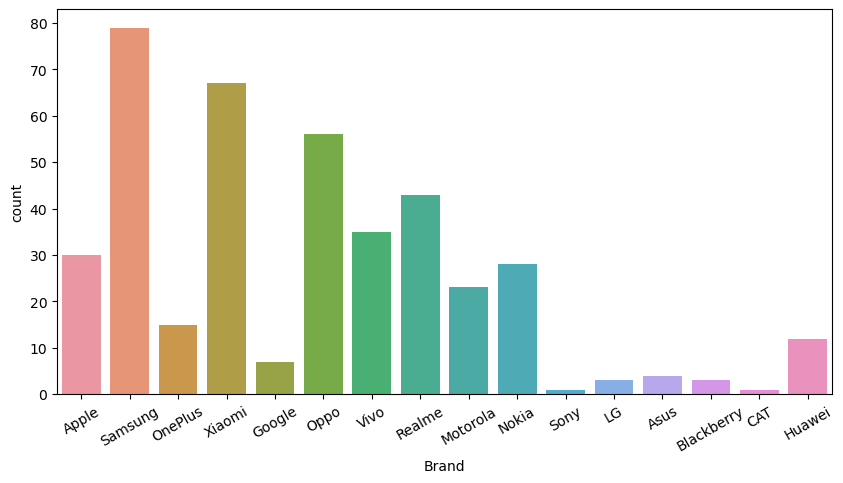

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="Brand")
plt.xticks(rotation=30)
plt.show()

### show relationship between price and storage
- Theres isnt a relationship between the price and storage according to my data as the data isnt spread to show the relationship between the two. So wether you have a bigger storage it doesnit affect the price of your phone.

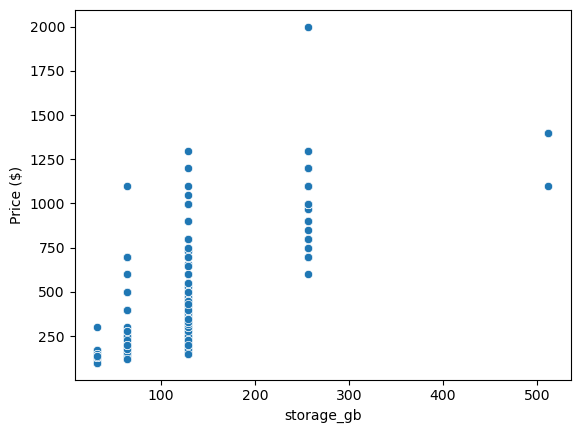

In [120]:
sns.scatterplot(data=data, y='Price ($)', x='storage_gb')
plt.show()

# Show relationship between RAM and price
- Well we all think that the price of any device depands on the RAM, but in my case with cell phone its doensnt seem to have a relationship so the RAM of the phone doesnot affect the price
- Just used the scatterplot to see if there was any relationship betweem storage and price, to my suprising theres no relationship

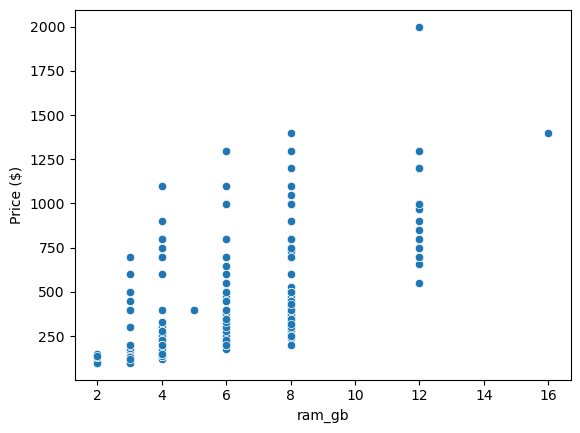

In [129]:
sns.scatterplot(data=data, y='Price ($)', x='ram_gb')
plt.show()

##### Showing the relationship between the Price and the Battery

- Well the data is clusted in the middle, so the phone that rank from around 250 dollars to 1000 dollols, the battery capacity is around 4000 to  5000 mAh
- Theres a strong consentration around the middle. Therefore this show that the is relationship or correlation between price and Battery capacity.The relationship is realtively strong. 

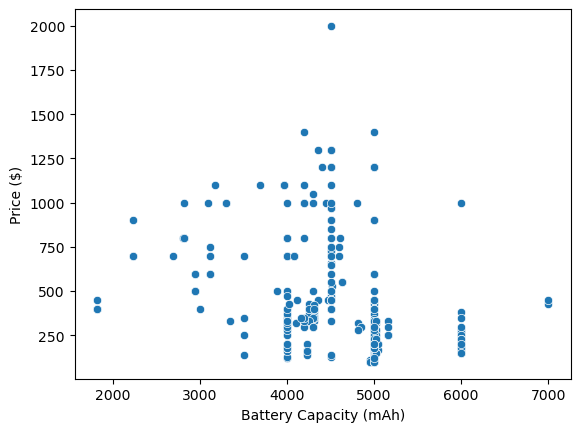

In [130]:
sns.scatterplot(data=data, y='Price ($)', x='Battery Capacity (mAh)')
plt.show()

### relationship between  price and screen size

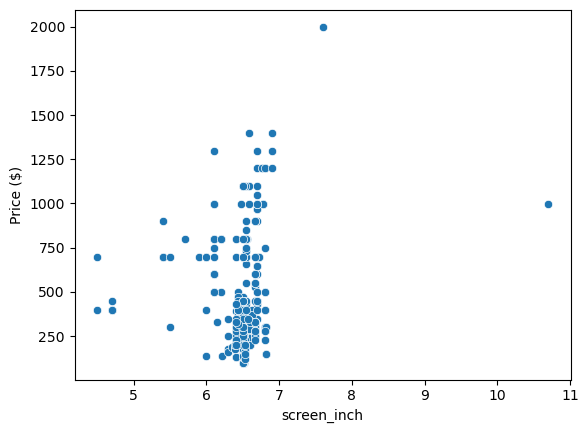

In [131]:
sns.scatterplot(data=data, y='Price ($)', x='screen_inch')
plt.show()


## screen and Price
- This graph shows a linear trend, which indicates that theres no or less realtionship as the price increases it doesnt mean that your screen inch will increase too or vice versa.

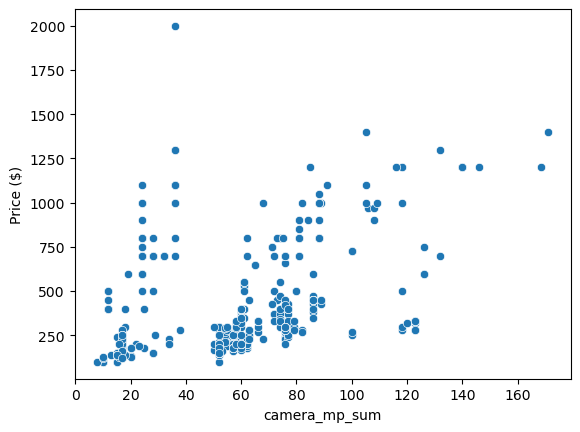

In [124]:
sns.scatterplot(data=data, y='Price ($)', x='camera_mp_sum')
plt.show()

#### Camera and Price

- As you take a look at the Above diagram 
- Well this does show that the higher the camara quality also the price increases too and the higher the price the better the quality


#Battery Capacity

- As you take a look at the below diagram 
- You can see that most bought phones have a battery capacity of 5000 mAh as the least bought have at around less tha 3000 mAh

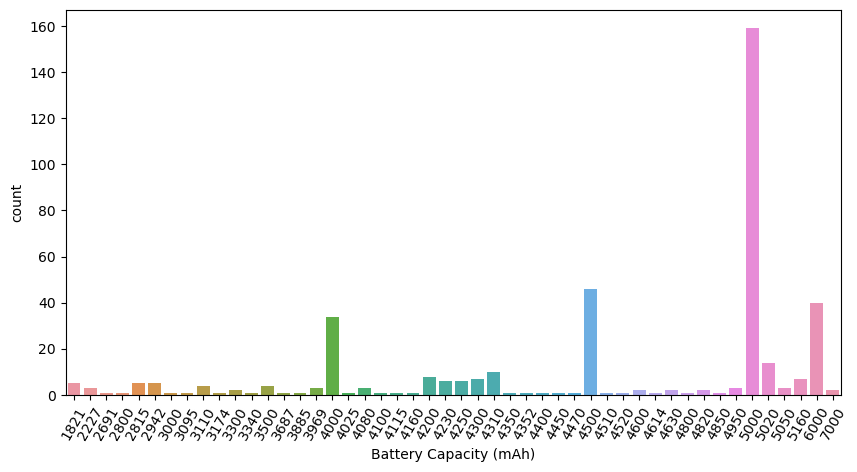

In [132]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="Battery Capacity (mAh)")
plt.xticks(rotation=60)
plt.show()

# price

-  Most Phones Trank at 250 dollsrs


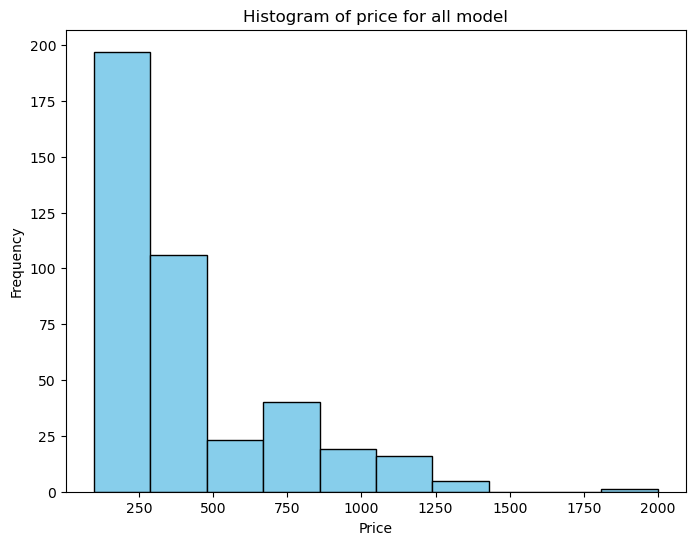

In [122]:
# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(data= data,x ="Price ($)", bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of price for all model')

# Show the plot
plt.show()

In [ ]:
data.columns

### Reflections on your learnings between this assignment and the previous one. What was different between Python and Excel? When will you use either of them?  If you could do this assignment over what would you do differently? What are the gaps in your programming or stats knowledge?

##### Excel is primarily suitable for tasks such as data entry, basic calculations, and simple visualizations like graphs and pie charts. It is very easy to use and It’s user-friendly, but I faced a challenge that deterred me from using it again, even if given the opportunity. The limitation was its inability to handle complex or large data set, and not being allowed to use its functions and formulas. Having to do things manually which was time consuming, and it tended to crash with large datasets. I dislike its tabular format for organizing, analyzing, and visualizing data.While Excel is a Microsoft program that’s easily accessible to Microsoft users, its commonly used in business, finance, and other fields requiring data management and analysis. Not things like Data Analysis, which is what we are doing for learning data. Excell is just boring, as with python you can show off your coding skills.  it falls short for tasks like extensive data analysis typically done in IT. For such purposes, I prefer Python, a high-level programming language renowned for its data analysis capabilities. Python's strength lies in its powerful libraries such as NumPy, pandas, and matplotlib, which I utilized for analyzing my dataset. Python enables efficient processing and analysis of large datasets without the risk of system crashes. Python is fun even though it may require more technical skills and knowledge, making it more challenging for non-technical collaborators to use and share.  Although I'm not an expert coder in Python, I'm proficient enough to navigate through it. Applying the statistical formulas, I learned in high school and combining them with Python's capabilities was relatively straightforward. While learning Excel was challenging initially due to lack of exposure, I found Python more enjoyable and flexible for completing assignments, thanks to its customizable nature.The previous was more difficult as I’ve never been exposed to excel in terms of having to analyze data manually without the use of the data analyses took that comes with excel. Unlike with python because I know my ways and enjoy with how flexible and customizable It is. Even though python also comes with its short cuts it was way easy, because in the first year I got to write the math’s formula and change it into a code. So, I prefer python for any data analysis.

